In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.cluster import KMeans, AgglomerativeClustering

In [49]:
df1 = pd.read_csv('HealthyLifestyle.csv')

In [50]:
df1.columns

Index(['City', 'Rank', 'Sunshine hours(City)',
       'Cost of a bottle of water(City)', 'Obesity levels(Country)',
       'Life expectancy(years) (Country)', 'Pollution(Index score) (City)',
       'Annual avg. hours worked', 'Happiness levels(Country)',
       'Outdoor activities(City)', 'Number of take out places(City)',
       'Cost of a monthly gym membership(City)'],
      dtype='object')

In [51]:
df1.isna().sum()

City                                      0
Rank                                      0
Sunshine hours(City)                      0
Cost of a bottle of water(City)           0
Obesity levels(Country)                   0
Life expectancy(years) (Country)          0
Pollution(Index score) (City)             0
Annual avg. hours worked                  0
Happiness levels(Country)                 0
Outdoor activities(City)                  0
Number of take out places(City)           0
Cost of a monthly gym membership(City)    0
dtype: int64

In [52]:
df1.head()

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
0,Amsterdam,1,1858,£1.92,20.40%,81.2,30.93,1434,7.44,422,1048,£34.90
1,Sydney,2,2636,£1.48,29.00%,82.1,26.86,1712,7.22,406,1103,£41.66
2,Vienna,3,1884,£1.94,20.10%,81.0,17.33,1501,7.29,132,1008,£25.74
3,Stockholm,4,1821,£1.72,20.60%,81.8,19.63,1452,7.35,129,598,£37.31
4,Copenhagen,5,1630,£2.19,19.70%,79.8,21.24,1380,7.64,154,523,£32.53


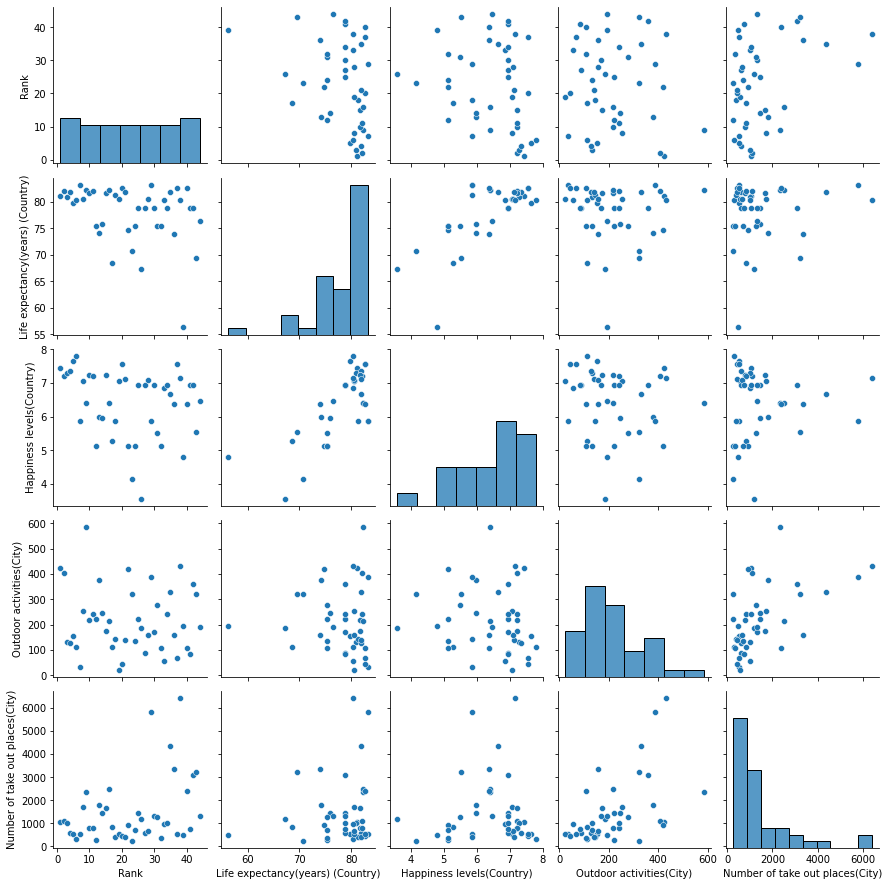

In [53]:
sns.pairplot(df1)

<AxesSubplot:>

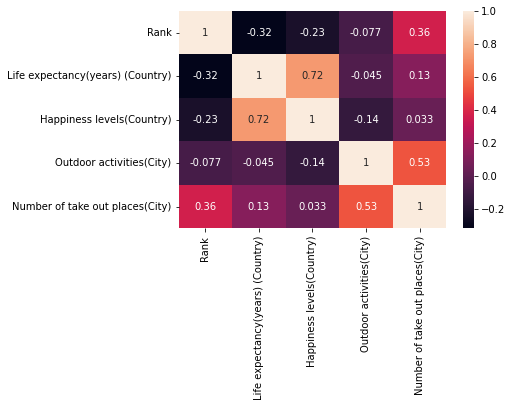

In [54]:
sns.heatmap(df1.corr(), annot=True)

<AxesSubplot:xlabel='Life expectancy(years) (Country)', ylabel='Outdoor activities(City)'>

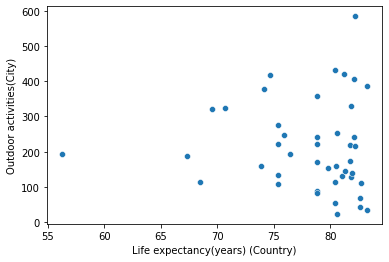

In [55]:
sns.scatterplot(x='Life expectancy(years) (Country)', y='Outdoor activities(City)', data=df1)

<AxesSubplot:xlabel='Outdoor activities(City)', ylabel='Number of take out places(City)'>

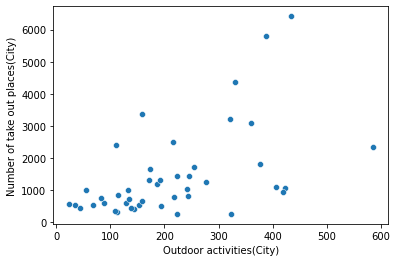

In [56]:
sns.scatterplot(x='Outdoor activities(City)', y='Number of take out places(City)', data=df1)

<AxesSubplot:xlabel='Life expectancy(years) (Country)', ylabel='Happiness levels(Country)'>

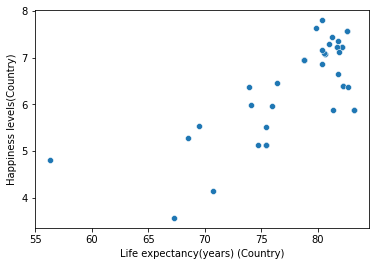

In [57]:
sns.scatterplot(x='Life expectancy(years) (Country)', y= 'Happiness levels(Country)', data=df1)

<AxesSubplot:xlabel='Number of take out places(City)', ylabel='Life expectancy(years) (Country)'>

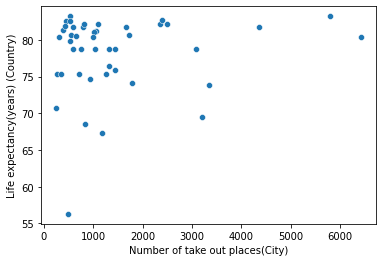

In [58]:
sns.scatterplot(x='Number of take out places(City)', y='Life expectancy(years) (Country)' , data=df1)

<AxesSubplot:xlabel='Happiness levels(Country)', ylabel='Number of take out places(City)'>

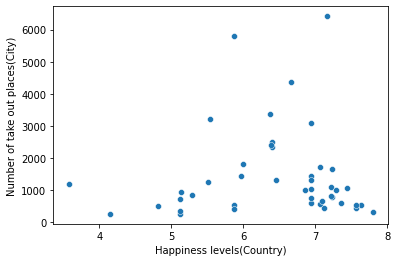

In [59]:
sns.scatterplot(x='Happiness levels(Country)', y=  'Number of take out places(City)', data=df1)

In [60]:
df1.head(5)

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
0,Amsterdam,1,1858,£1.92,20.40%,81.2,30.93,1434,7.44,422,1048,£34.90
1,Sydney,2,2636,£1.48,29.00%,82.1,26.86,1712,7.22,406,1103,£41.66
2,Vienna,3,1884,£1.94,20.10%,81.0,17.33,1501,7.29,132,1008,£25.74
3,Stockholm,4,1821,£1.72,20.60%,81.8,19.63,1452,7.35,129,598,£37.31
4,Copenhagen,5,1630,£2.19,19.70%,79.8,21.24,1380,7.64,154,523,£32.53


In [61]:
X = df1[['Happiness levels(Country)', 'Outdoor activities(City)', 'Number of take out places(City)', 'Life expectancy(years) (Country)']]

In [62]:
inertia = []
for k in range(1,6):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))


Text(0, 0.5, 'Variance')

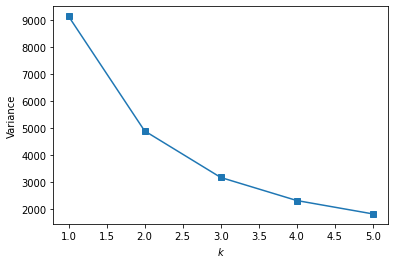

In [63]:
plt.plot(range(1, 6), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('Variance')

In [64]:
kmeans = KMeans(n_clusters=2)
k_fit = kmeans.fit(X)

y = kmeans.fit_predict(X)

In [65]:
df1.columns

Index(['City', 'Rank', 'Sunshine hours(City)',
       'Cost of a bottle of water(City)', 'Obesity levels(Country)',
       'Life expectancy(years) (Country)', 'Pollution(Index score) (City)',
       'Annual avg. hours worked', 'Happiness levels(Country)',
       'Outdoor activities(City)', 'Number of take out places(City)',
       'Cost of a monthly gym membership(City)'],
      dtype='object')

<AxesSubplot:xlabel='Life expectancy(years) (Country)', ylabel='Outdoor activities(City)'>

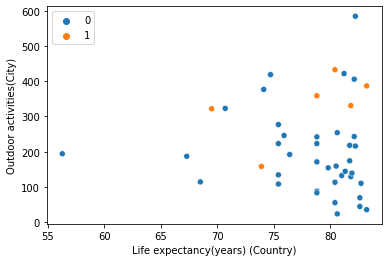

In [66]:
sns.scatterplot(x =df1['Life expectancy(years) (Country)'] , y = df1['Outdoor activities(City)'], hue=y)

<AxesSubplot:xlabel='Outdoor activities(City)', ylabel='Number of take out places(City)'>

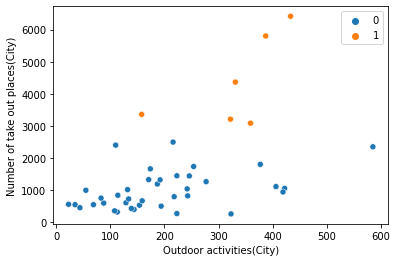

In [67]:
sns.scatterplot(x =df1['Outdoor activities(City)'] , y = df1['Number of take out places(City)'], hue=y)

<AxesSubplot:xlabel='Life expectancy(years) (Country)', ylabel='Happiness levels(Country)'>

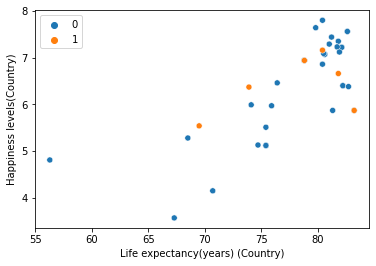

In [68]:
sns.scatterplot(x =df1['Life expectancy(years) (Country)'] , y = df1['Happiness levels(Country)'], hue=y)

<AxesSubplot:xlabel='Number of take out places(City)', ylabel='Life expectancy(years) (Country)'>

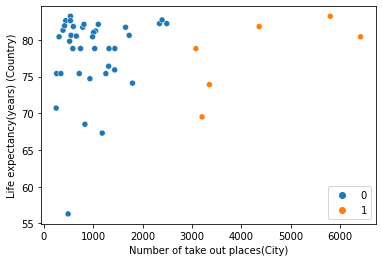

In [69]:
sns.scatterplot(x =df1['Number of take out places(City)'] , y = df1['Life expectancy(years) (Country)'], hue=y)

<AxesSubplot:xlabel='Happiness levels(Country)', ylabel='Number of take out places(City)'>

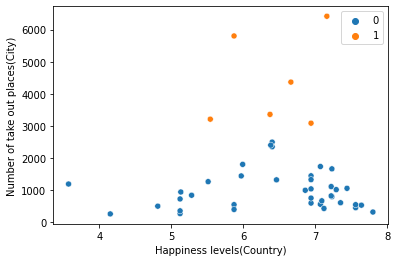

In [70]:
sns.scatterplot(x =df1['Happiness levels(Country)'] , y = df1[ 'Number of take out places(City)'], hue=y)




 

In [71]:
Y_df = pd.DataFrame(y, columns=['cluster'])
df2 = pd.concat([df1, Y_df], axis=1)

In [72]:
df2

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City),cluster
0,Amsterdam,1,1858,£1.92,20.40%,81.2,30.93,1434,7.44,422,1048,£34.90,0
1,Sydney,2,2636,£1.48,29.00%,82.1,26.86,1712,7.22,406,1103,£41.66,0
2,Vienna,3,1884,£1.94,20.10%,81.0,17.33,1501,7.29,132,1008,£25.74,0
3,Stockholm,4,1821,£1.72,20.60%,81.8,19.63,1452,7.35,129,598,£37.31,0
4,Copenhagen,5,1630,£2.19,19.70%,79.8,21.24,1380,7.64,154,523,£32.53,0
5,Helsinki,6,1662,£1.60,22.20%,80.4,13.08,1540,7.80,113,309,£35.23,0
6,Fukuoka,7,2769,£0.78,4.30%,83.2,-,1644,5.87,35,539,£55.87,0
7,Berlin,8,1626,£1.55,22.30%,80.6,39.41,1386,7.07,254,1729,£26.11,0
8,Barcelona,9,2591,£1.19,23.80%,82.2,65.19,1686,6.40,585,2344,£37.80,0
9,Vancouver,10,1938,£1.08,29.40%,81.7,24.26,1670,7.23,218,788,£31.04,0
